# Lab 1/2 EMG Processing

This lab will go into the basics of real-time classification using EMG signals. 

In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import matplotlib.pyplot as plt

In [2]:
# Lets read in our data
import os
directory = 'Data/'
path = 'Your/Path/Here'
data_df = pd.read_csv(directory + path)
display(data_df)

,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
0,2050,1999,2035,1987,1972,2143,2034,2042,2052,2089,2035,2023,2099,1997,2007,2076,-1,NaN
1,2056,2003,2027,1977,1967,2150,2031,2043,2049,2104,2045,2024,2099,1993,1997,2073,-1,NaN
2,2055,2011,2015,1991,1966,2152,2040,2027,2048,2101,2053,2015,2101,1997,2004,2070,-1,NaN
3,2064,2012,2018,1990,1966,2137,2037,2021,2039,2101,2055,2032,2096,2002,2003,2072,-1,NaN
4,2071,2021,1985,1971,1963,2149,2033,2039,2050,2099,2056,2037,2096,1991,2001,2075,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139995,-25,-11,-4,7,14,23,26,-28,-48,-29,-21,14,24,53,50,-27,6,NaN
139996,-2,30,12,15,-4,-36,-20,5,22,-11,0,22,7,-32,-22,4,6,NaN
139997,-1,34,6,0,-33,-36,18,19,68,-17,-12,-9,-18,-37,-21,38,6,NaN
139998,0,8,-9,-11,-9,4,12,0,57,-25,-6,-10,-10,-3,-28,32,6,NaN


dict_keys([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

Descriptive Stats for Class:  -1


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,6.687600,6.571400,6.686800,6.537700,6.434000,6.833800,6.662800,6.554700,6.695900,6.811100,6.640600,6.594300,6.866900,6.495800,6.541200,6.745200,-1.0,NaN
std,116.794786,115.076377,119.674161,116.221973,112.860928,123.207226,115.833778,119.746951,119.001038,120.177949,118.161504,116.137137,120.083144,113.916654,114.318983,118.042128,0.0,NaN
min,-125.000000,-128.000000,-322.000000,-267.000000,-185.000000,-351.000000,-150.000000,-441.000000,-273.000000,-299.000000,-229.000000,-197.000000,-178.000000,-190.000000,-314.000000,-184.000000,-1.0,NaN
25%,-4.000000,-6.000000,-10.000000,-10.000000,-5.000000,-9.000000,-4.000000,-8.000000,-6.000000,-5.000000,-8.000000,-7.000000,-5.000000,-5.000000,-5.000000,-4.000000,-1.0,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,NaN
75%,4.000000,6.000000,9.000000,10.000000,6.000000,10.000000,5.000000,10.000000,6.000000,5.000000,9.000000,8.000000,6.000000,5.000000,5.000000,4.000000,-1.0,NaN
max,2077.000000,2040.000000,2134.000000,2040.000000,1986.000000,2172.000000,2047.000000,2079.000000,2067.000000,2106.000000,2072.000000,2043.000000,2116.000000,2010.000000,2025.000000,2076.000000,-1.0,NaN


EMG Plot for Class:  -1
Descriptive Stats for Class:  0


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,0.009000,-0.005400,-0.001000,0.009400,0.017600,0.002600,-0.006700,-0.016600,0.001400,-0.004000,-0.001900,0.002500,0.019200,0.009000,0.004900,-0.001000,0.0,NaN
std,14.215946,14.312912,13.240088,12.446735,13.270641,16.337187,15.975825,15.710398,33.401748,25.941921,21.223245,16.778225,15.689265,22.630478,22.915235,28.369566,0.0,NaN
min,-167.000000,-134.000000,-153.000000,-104.000000,-74.000000,-146.000000,-95.000000,-182.000000,-260.000000,-249.000000,-258.000000,-146.000000,-92.000000,-126.000000,-167.000000,-306.000000,0.0,NaN
25%,-5.000000,-6.000000,-6.000000,-6.000000,-7.000000,-8.000000,-9.000000,-7.000000,-10.000000,-7.000000,-6.000000,-7.000000,-8.000000,-12.000000,-12.000000,-13.000000,0.0,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,NaN
75%,5.000000,6.000000,6.000000,6.000000,7.000000,8.000000,9.000000,7.000000,9.000000,7.000000,6.000000,7.000000,7.000000,11.000000,12.000000,14.000000,0.0,NaN
max,211.000000,138.000000,127.000000,118.000000,111.000000,131.000000,91.000000,131.000000,329.000000,200.000000,161.000000,116.000000,150.000000,187.000000,164.000000,186.000000,0.0,NaN


EMG Plot for Class:  0
Descriptive Stats for Class:  1


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,-0.004400,0.004100,0.005000,0.006400,0.01670,-0.004900,-0.009000,-0.014900,0.0118,0.015300,-0.007700,0.002400,0.00510,0.010400,-0.003900,-0.017100,1.0,NaN
std,13.031269,12.571097,13.964701,16.984152,30.10806,35.214751,22.309516,15.071642,22.4709,17.134469,21.360058,25.863857,37.01041,42.496559,41.621674,28.146553,0.0,NaN
min,-129.000000,-118.000000,-161.000000,-205.000000,-229.00000,-515.000000,-234.000000,-137.000000,-332.0000,-190.000000,-338.000000,-255.000000,-271.00000,-355.000000,-425.000000,-490.000000,1.0,NaN
25%,-5.000000,-6.000000,-7.000000,-8.000000,-16.00000,-13.000000,-11.000000,-7.000000,-8.0000,-6.000000,-8.000000,-12.000000,-17.00000,-20.000000,-18.000000,-11.000000,1.0,NaN
50%,0.000000,0.000000,0.000000,0.000000,-1.00000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-1.00000,0.000000,0.000000,0.000000,1.0,NaN
75%,5.000000,5.000000,7.000000,8.000000,14.00000,15.000000,12.000000,7.000000,8.0000,6.000000,9.000000,11.000000,16.00000,21.000000,20.000000,12.000000,1.0,NaN
max,199.000000,208.000000,143.000000,128.000000,352.00000,383.000000,179.000000,163.000000,310.0000,309.000000,241.000000,239.000000,458.00000,397.000000,437.000000,274.000000,1.0,NaN


EMG Plot for Class:  1
Descriptive Stats for Class:  2


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,0.008300,-0.012500,0.004100,0.005100,-0.000500,0.00350,0.011800,0.004900,0.017700,0.001000,-0.01560,0.004000,-0.007300,0.020900,0.002200,-0.005800,2.0,NaN
std,10.876372,9.672068,9.868071,13.267113,18.150731,22.76842,15.251286,11.880058,25.631822,18.807673,23.99729,19.388568,16.029278,20.259065,14.675269,20.378761,0.0,NaN
min,-82.000000,-78.000000,-72.000000,-129.000000,-177.000000,-328.00000,-151.000000,-104.000000,-231.000000,-113.000000,-186.00000,-298.000000,-212.000000,-252.000000,-141.000000,-193.000000,2.0,NaN
25%,-6.000000,-5.000000,-5.000000,-6.000000,-8.000000,-7.00000,-7.000000,-7.000000,-14.000000,-10.000000,-12.00000,-9.000000,-7.000000,-9.000000,-8.000000,-12.000000,2.0,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,NaN
75%,6.000000,6.000000,5.000000,6.000000,7.000000,7.00000,7.000000,7.000000,12.000000,10.000000,13.00000,10.000000,7.000000,8.000000,8.000000,11.000000,2.0,NaN
max,116.000000,72.000000,81.000000,134.000000,262.000000,180.00000,159.000000,72.000000,211.000000,152.000000,125.00000,192.000000,207.000000,358.000000,198.000000,229.000000,2.0,NaN


EMG Plot for Class:  2
Descriptive Stats for Class:  3


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,0.0
mean,0.003100,0.003700,-0.009100,0.000200,-0.005300,-0.00650,-0.011200,0.002300,-0.009100,-0.015600,0.024600,0.014600,-0.009500,0.01240,0.009000,-0.002700,3.0,NaN
std,33.499279,29.998288,28.380694,24.605697,18.875034,19.17634,23.554799,25.287523,86.213754,106.074905,94.600613,52.941557,33.198109,31.34115,37.711981,48.765997,0.0,NaN
min,-180.000000,-218.000000,-178.000000,-145.000000,-98.000000,-228.00000,-113.000000,-124.000000,-448.000000,-529.000000,-535.000000,-267.000000,-164.000000,-150.00000,-197.000000,-274.000000,3.0,NaN
25%,-19.000000,-16.000000,-14.000000,-13.000000,-12.000000,-11.00000,-15.000000,-15.000000,-46.000000,-56.000000,-46.000000,-28.000000,-20.000000,-19.00000,-22.000000,-27.000000,3.0,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.0,NaN
75%,18.000000,16.000000,15.000000,14.000000,12.000000,11.00000,14.000000,14.000000,44.000000,52.000000,49.000000,27.000000,19.000000,19.00000,23.000000,27.000000,3.0,NaN
max,230.000000,175.000000,151.000000,108.000000,148.000000,157.00000,115.000000,157.000000,575.000000,566.000000,485.000000,300.000000,173.000000,166.00000,174.000000,209.000000,3.0,NaN


EMG Plot for Class:  3
Descriptive Stats for Class:  4


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,0.0
mean,-0.000400,-0.00420,0.005900,0.012000,0.047600,-0.016900,-0.00710,-0.001400,-0.022900,0.012400,-0.007900,0.021200,0.052600,0.01590,-0.052900,-0.030100,4.0,NaN
std,24.123644,21.88135,23.285349,38.977442,81.659763,90.795056,62.67028,33.279383,31.756631,18.922617,33.853931,62.909898,83.259516,101.52233,122.837277,65.448584,0.0,NaN
min,-185.000000,-207.00000,-196.000000,-416.000000,-662.000000,-626.000000,-461.00000,-350.000000,-195.000000,-121.000000,-279.000000,-467.000000,-539.000000,-542.00000,-696.000000,-347.000000,4.0,NaN
25%,-12.000000,-10.00000,-13.000000,-19.000000,-39.000000,-42.000000,-31.00000,-17.000000,-17.000000,-10.000000,-19.000000,-33.000000,-47.000000,-57.00000,-63.000000,-34.000000,4.0,NaN
50%,0.000000,0.00000,0.000000,-1.000000,-2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,-2.00000,4.000000,2.000000,4.0,NaN
75%,12.000000,10.00000,12.000000,18.000000,35.000000,45.000000,34.00000,18.000000,18.000000,10.000000,18.000000,32.000000,44.000000,52.00000,69.000000,37.000000,4.0,NaN
max,216.000000,293.00000,208.000000,339.000000,710.000000,859.000000,421.00000,176.000000,167.000000,132.000000,272.000000,634.000000,423.000000,696.00000,889.000000,464.000000,4.0,NaN


EMG Plot for Class:  4
Descriptive Stats for Class:  5


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,0.001700,0.008000,-0.003900,-0.006700,0.012100,-0.006800,0.012400,-0.002100,0.015400,0.02090,-0.016200,-0.013600,-0.019400,-0.003300,0.007000,0.012100,5.0,NaN
std,30.647679,31.699571,36.818124,46.814618,56.148956,67.078286,47.130559,32.107672,60.894126,55.90361,67.275653,66.568935,68.996296,71.413782,77.766924,59.802874,0.0,NaN
min,-222.000000,-281.000000,-443.000000,-528.000000,-437.000000,-720.000000,-441.000000,-230.000000,-507.000000,-496.00000,-1011.000000,-470.000000,-473.000000,-446.000000,-580.000000,-713.000000,5.0,NaN
25%,-14.000000,-14.000000,-14.000000,-17.000000,-21.000000,-23.000000,-22.000000,-15.000000,-23.000000,-23.00000,-28.000000,-30.000000,-30.000000,-34.000000,-33.000000,-29.000000,5.0,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,5.0,NaN
75%,13.000000,14.000000,15.000000,16.000000,20.000000,26.000000,23.000000,15.000000,23.000000,21.00000,29.000000,31.000000,27.000000,32.000000,37.000000,31.000000,5.0,NaN
max,394.000000,241.000000,399.000000,567.000000,562.000000,485.000000,288.000000,282.000000,667.000000,567.00000,579.000000,494.000000,630.000000,470.000000,466.000000,505.000000,5.0,NaN


EMG Plot for Class:  5
Descriptive Stats for Class:  6


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,0.02310,0.019400,-0.00470,-0.006200,-0.01180,-0.011200,-0.012600,-0.001700,-0.002000,0.005100,-0.00120,-0.000200,0.016100,-0.017600,-0.012300,0.007500,6.0,NaN
std,20.25573,20.614522,13.24765,14.319527,27.15687,35.614465,34.834712,21.946058,33.742108,27.597946,19.56562,21.402846,34.097494,57.408491,50.223148,45.072366,0.0,NaN
min,-117.00000,-92.000000,-66.00000,-72.000000,-148.00000,-330.000000,-200.000000,-153.000000,-210.000000,-163.000000,-107.00000,-140.000000,-209.000000,-396.000000,-385.000000,-316.000000,6.0,NaN
25%,-12.00000,-12.000000,-8.00000,-8.000000,-14.00000,-17.000000,-17.000000,-11.000000,-18.000000,-15.000000,-12.00000,-12.000000,-17.000000,-28.000000,-23.000000,-21.000000,6.0,NaN
50%,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,1.000000,0.000000,6.0,NaN
75%,11.00000,12.000000,8.00000,8.000000,13.00000,18.000000,18.000000,12.000000,18.000000,15.000000,12.00000,12.000000,15.000000,24.250000,26.000000,22.000000,6.0,NaN
max,113.00000,126.000000,63.00000,142.000000,230.00000,193.000000,201.000000,152.000000,206.000000,161.000000,89.00000,151.000000,264.000000,396.000000,259.000000,322.000000,6.0,NaN


EMG Plot for Class:  6
Descriptive Stats for Class:  7


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,0.0
mean,0.006900,0.004200,0.00470,0.023300,0.027100,-0.016800,-0.012200,-0.009800,-0.012900,-0.006800,0.009900,0.015300,0.013500,0.006300,-0.02870,-0.016900,7.0,NaN
std,26.732039,22.451891,31.36398,44.897258,90.838696,119.841306,69.630412,46.001501,42.810127,24.037374,44.892618,73.631389,107.114229,129.650435,134.96305,89.579504,0.0,NaN
min,-250.000000,-159.000000,-186.00000,-245.000000,-486.000000,-932.000000,-471.000000,-443.000000,-373.000000,-200.000000,-266.000000,-446.000000,-535.000000,-903.000000,-1008.00000,-678.000000,7.0,NaN
25%,-14.000000,-12.000000,-16.00000,-23.000000,-46.000000,-57.000000,-34.000000,-22.000000,-20.000000,-13.000000,-24.000000,-38.000000,-57.000000,-69.000000,-64.00000,-41.000000,7.0,NaN
50%,0.000000,0.000000,0.00000,-1.000000,-3.000000,4.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,-2.000000,-4.000000,0.000000,5.00000,3.000000,7.0,NaN
75%,14.000000,11.000000,15.00000,20.000000,42.000000,62.000000,36.000000,23.000000,22.000000,13.000000,22.000000,35.000000,50.000000,69.000000,73.00000,47.000000,7.0,NaN
max,171.000000,158.000000,200.00000,282.000000,574.000000,682.000000,412.000000,278.000000,217.000000,161.000000,337.000000,595.000000,821.000000,871.000000,630.00000,505.000000,7.0,NaN


EMG Plot for Class:  7
Descriptive Stats for Class:  8


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,0.012900,0.02540,0.003400,-0.008700,-0.000400,-0.010100,-0.023300,-0.005400,0.004600,0.026100,-0.022200,-0.015200,0.022300,-0.021300,0.000300,0.001500,8.0,NaN
std,29.036251,40.48147,41.120867,52.664599,50.097209,65.356667,42.747371,27.752459,25.399419,27.766849,64.046673,68.449058,51.564087,64.394342,69.454296,39.906445,0.0,NaN
min,-261.000000,-491.00000,-516.000000,-552.000000,-339.000000,-455.000000,-252.000000,-163.000000,-191.000000,-200.000000,-822.000000,-476.000000,-251.000000,-526.000000,-523.000000,-291.000000,8.0,NaN
25%,-12.000000,-13.00000,-17.000000,-19.000000,-26.000000,-30.000000,-21.000000,-14.000000,-12.000000,-11.000000,-21.000000,-29.000000,-27.000000,-33.000000,-33.000000,-20.000000,8.0,NaN
50%,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,8.0,NaN
75%,11.000000,12.00000,16.000000,20.000000,25.000000,35.000000,23.000000,13.000000,12.000000,10.000000,24.000000,31.000000,24.000000,33.000000,34.000000,20.000000,8.0,NaN
max,370.000000,600.00000,466.000000,543.000000,329.000000,342.000000,216.000000,236.000000,209.000000,334.000000,497.000000,550.000000,376.000000,396.000000,360.000000,233.000000,8.0,NaN


EMG Plot for Class:  8
Descriptive Stats for Class:  9


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,0.0
mean,-0.002900,-0.002900,-0.00220,0.005900,0.02710,-0.031400,0.01150,-0.002700,-0.001400,0.011800,0.011300,0.024200,0.045800,0.024300,-0.04260,-0.035000,9.0,NaN
std,10.366399,10.577177,12.39745,16.566258,28.95655,43.253389,21.59034,12.730338,17.930888,20.814946,22.750581,29.762543,41.241207,49.366315,61.05602,32.287029,0.0,NaN
min,-69.000000,-94.000000,-110.00000,-136.000000,-216.00000,-344.000000,-160.00000,-113.000000,-153.000000,-233.000000,-316.000000,-169.000000,-253.000000,-409.000000,-427.00000,-254.000000,9.0,NaN
25%,-6.000000,-5.000000,-7.00000,-9.000000,-17.00000,-23.000000,-12.00000,-7.000000,-10.000000,-9.000000,-11.000000,-17.000000,-24.000000,-29.000000,-31.00000,-16.000000,9.0,NaN
50%,0.000000,0.000000,0.00000,0.000000,-1.00000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,4.00000,2.000000,9.0,NaN
75%,6.000000,5.000000,7.00000,9.000000,16.00000,26.000000,12.00000,7.000000,10.000000,8.000000,11.000000,16.000000,20.000000,26.000000,36.00000,19.000000,9.0,NaN
max,68.000000,103.000000,123.00000,178.000000,267.00000,213.000000,162.00000,88.000000,115.000000,256.000000,194.000000,264.000000,331.000000,391.000000,361.00000,219.000000,9.0,NaN


EMG Plot for Class:  9
Descriptive Stats for Class:  10


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,0.002300,-0.0017,0.013300,0.015200,0.011900,-0.012800,-0.006600,-0.006000,-0.00370,0.00000,0.000900,-0.002500,0.008900,0.017400,-0.012200,-0.025400,10.0,NaN
std,10.752937,10.5280,11.077129,15.018073,24.189731,32.312005,21.004311,12.702287,22.12914,17.39722,18.626298,22.100795,26.775476,41.103725,40.064233,27.272135,0.0,NaN
min,-95.000000,-136.0000,-83.000000,-92.000000,-105.000000,-250.000000,-116.000000,-92.000000,-188.00000,-182.00000,-258.000000,-190.000000,-111.000000,-183.000000,-224.000000,-204.000000,10.0,NaN
25%,-6.000000,-6.0000,-6.000000,-9.000000,-15.000000,-19.000000,-12.000000,-7.000000,-13.00000,-8.00000,-8.000000,-13.000000,-17.000000,-27.000000,-22.000000,-15.000000,10.0,NaN
50%,0.000000,0.0000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,-1.000000,-2.000000,2.000000,1.000000,10.0,NaN
75%,5.000000,6.0000,6.000000,8.000000,13.000000,20.000000,12.000000,7.000000,12.00000,8.00000,9.000000,13.000000,15.000000,24.000000,24.000000,16.000000,10.0,NaN
max,141.000000,105.0000,70.000000,125.000000,212.000000,133.000000,126.000000,86.000000,159.00000,174.00000,182.000000,128.000000,163.000000,227.000000,201.000000,193.000000,10.0,NaN


EMG Plot for Class:  10
Descriptive Stats for Class:  11


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0,0.0
mean,0.009900,0.00700,-0.01400,-0.012000,0.009500,-0.002700,0.010700,0.005800,0.011600,-0.002300,0.005500,0.008700,0.014500,0.009600,-0.01200,-0.007700,11.0,NaN
std,11.701782,11.51427,10.50878,9.806298,13.920574,16.669633,13.754698,10.281544,22.230886,17.636218,13.932189,13.789483,17.751552,24.196889,26.29064,20.431015,0.0,NaN
min,-103.000000,-180.00000,-120.00000,-72.000000,-126.000000,-214.000000,-141.000000,-110.000000,-211.000000,-150.000000,-158.000000,-136.000000,-130.000000,-208.000000,-275.00000,-187.000000,11.0,NaN
25%,-6.000000,-6.00000,-6.00000,-5.000000,-7.000000,-7.000000,-7.000000,-6.000000,-11.000000,-8.000000,-7.000000,-7.000000,-9.000000,-13.000000,-14.00000,-10.000000,11.0,NaN
50%,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,11.0,NaN
75%,6.000000,6.00000,6.00000,6.000000,7.000000,7.000000,7.000000,6.000000,10.000000,9.000000,7.000000,7.000000,9.000000,12.000000,14.00000,11.000000,11.0,NaN
max,124.000000,92.00000,58.00000,87.000000,170.000000,153.000000,112.000000,96.000000,352.000000,156.000000,116.000000,138.000000,196.000000,280.000000,178.00000,206.000000,11.0,NaN


EMG Plot for Class:  11
Descriptive Stats for Class:  12


,EMG1,EMG2,EMG3,EMG4,EMG5,EMG6,EMG7,EMG8,EMG9,EMG10,EMG11,EMG12,EMG13,EMG14,EMG15,EMG16,Class,Unknown
count,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,0.0
mean,0.024900,-0.00250,-0.01190,-0.005200,-0.001500,-0.015800,0.000600,0.010600,0.020200,0.022100,-0.002600,-0.011000,0.001100,0.024900,-0.007400,-0.007800,12.0,NaN
std,18.556722,19.95863,22.58375,22.503133,29.635683,37.832921,24.584553,18.309763,33.095452,49.414704,40.293614,40.110726,43.509765,50.351646,59.305676,36.567421,0.0,NaN
min,-120.000000,-135.00000,-136.00000,-122.000000,-215.000000,-301.000000,-208.000000,-151.000000,-244.000000,-251.000000,-281.000000,-279.000000,-240.000000,-282.000000,-459.000000,-249.000000,12.0,NaN
25%,-10.000000,-10.00000,-12.00000,-13.000000,-18.000000,-21.000000,-14.000000,-10.000000,-17.000000,-26.000000,-20.000000,-23.000000,-26.000000,-32.000000,-32.000000,-20.000000,12.0,NaN
50%,0.000000,0.00000,0.00000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-2.000000,2.000000,1.000000,12.0,NaN
75%,9.000000,11.00000,12.00000,13.000000,16.000000,23.000000,14.000000,10.000000,17.000000,25.000000,21.000000,23.000000,24.000000,29.000000,37.000000,22.000000,12.0,NaN
max,201.000000,160.00000,137.00000,119.000000,219.000000,212.000000,166.000000,153.000000,319.000000,298.000000,257.000000,234.000000,326.000000,303.000000,327.000000,201.000000,12.0,NaN


EMG Plot for Class:  12


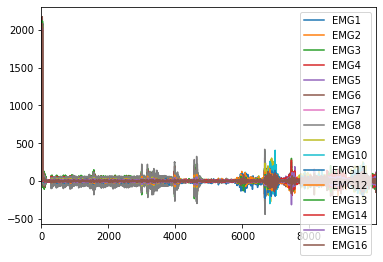

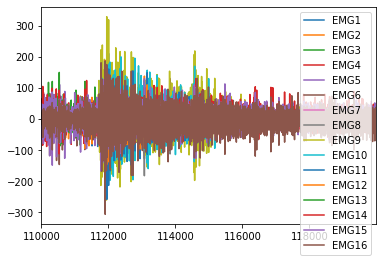

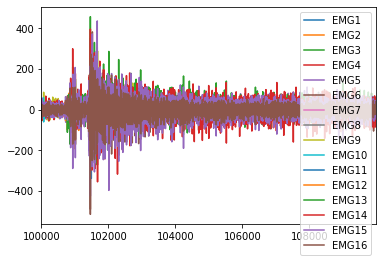

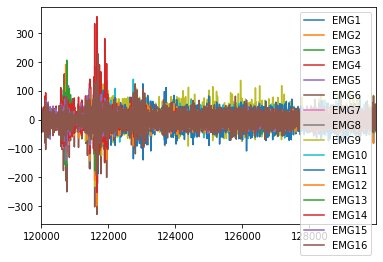

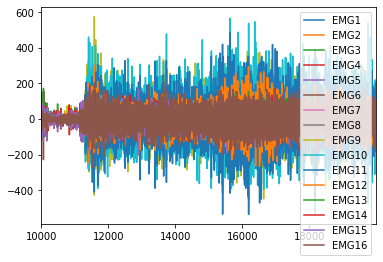

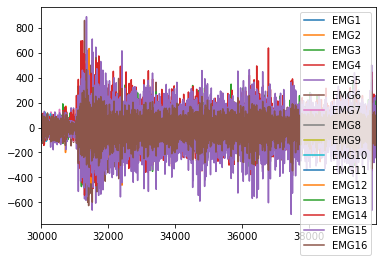

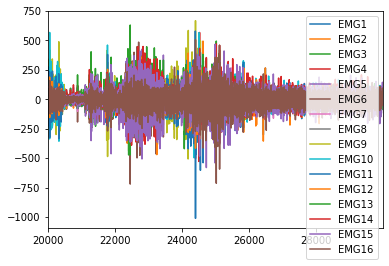

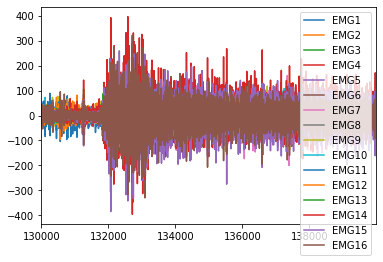

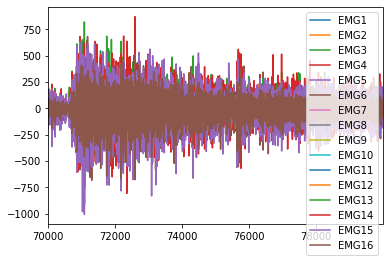

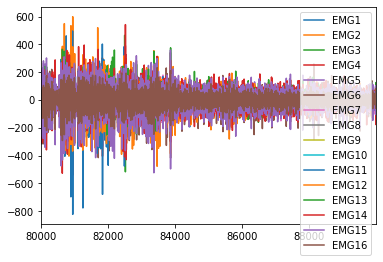

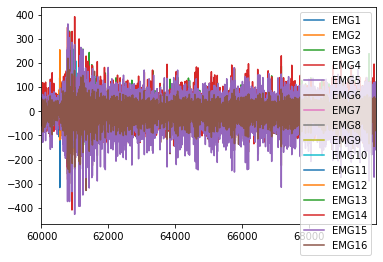

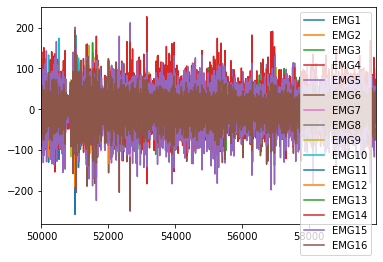

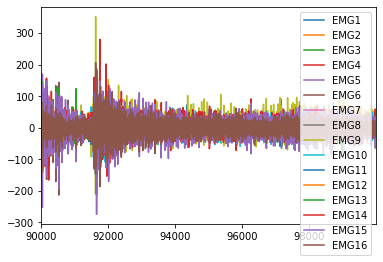

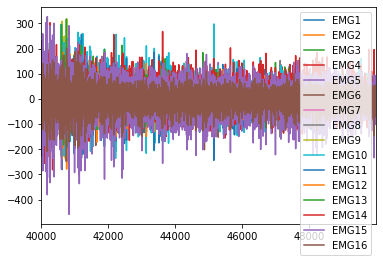

In [3]:
# We can describe and look at the data for each task
grouped_df = data_df.groupby('Class')

display(grouped_df.groups.keys())

for group in grouped_df.groups:
    print('Descriptive Stats for Class: ', group)
    display(grouped_df.get_group(group).describe())
    print('EMG Plot for Class: ', group)
    grouped_df.get_group(group).plot(y=['EMG' + str(i) for i in range(1, 17)])


In [5]:
def sliding_window(df, window_size, stride, fs = 1000):
    # This function only works for continous dfs (not multiple combined participant dfs)
    dfs = []
    df_cop = df.copy() # create copy of dataframe
    starting_index = df_cop.index[0]
    ending_index = int(df_cop.index[0] + fs*window_size)
    while ending_index <= df_cop.index[-1]:
        windowed_df = df_cop.loc[(df_cop.index >= starting_index) & (df_cop.index <= ending_index)] 
        dfs.append(windowed_df)
        starting_index = int(starting_index + fs*stride)
        ending_index = int(ending_index + fs*stride)
    return dfs

windows = sliding_window(data_df, window_size = 5, stride = 1)
display(len(windows))



135

## Simple EMG Processing
We can do some simple processing to clean the signal. Right now, we are only going to look at rectifing the signal

In [ ]:
rectified_df = data_df.copy()

for col in ['EMG' + str(i) for i in range(1, 17)]:
    rectified_df[col] = rectified_df[col].apply(abs) # applys the absolute function to each channel
    
display(rectified_df)


## Advanced Filtering

Now we are going to build a filter emg function for some advanced filtering

In [ ]:
import scipy as sp
import scipy.signal

def filteremg(emg, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    return emg_envelope
    

filt_emg = data_df.copy()
emg_keys = ['EMG' + str(i) for i in range(1, 17)]

filt_emg[emg_keys] = filt_emg[emg_keys].apply(filteremg)

    
display(filt_emg)
    


# Feature Extraction

